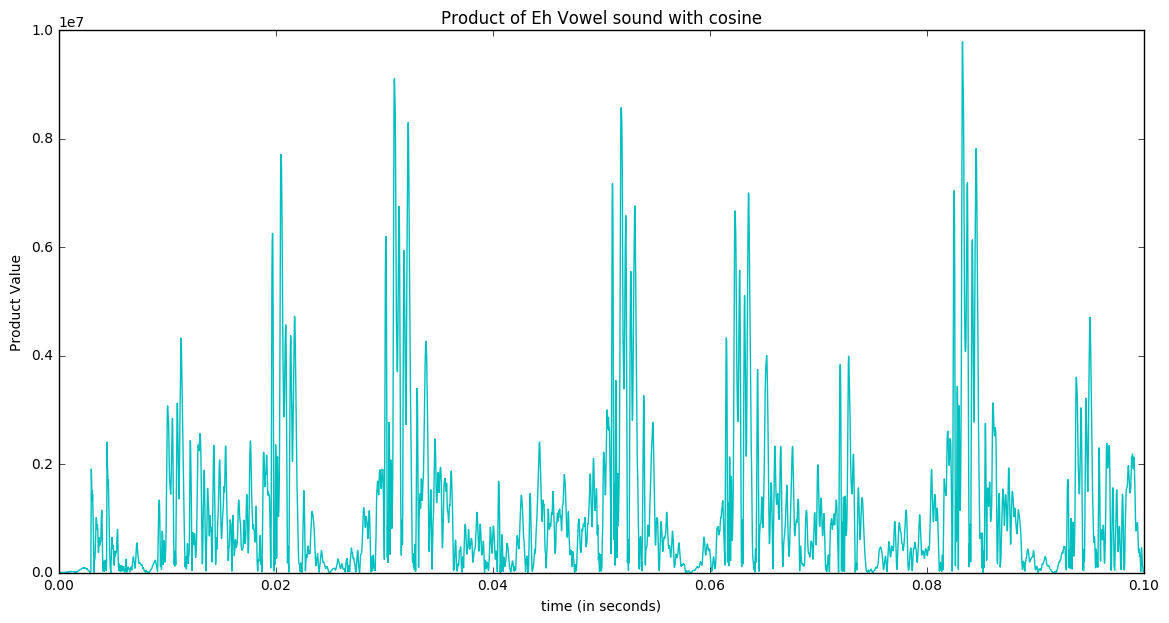

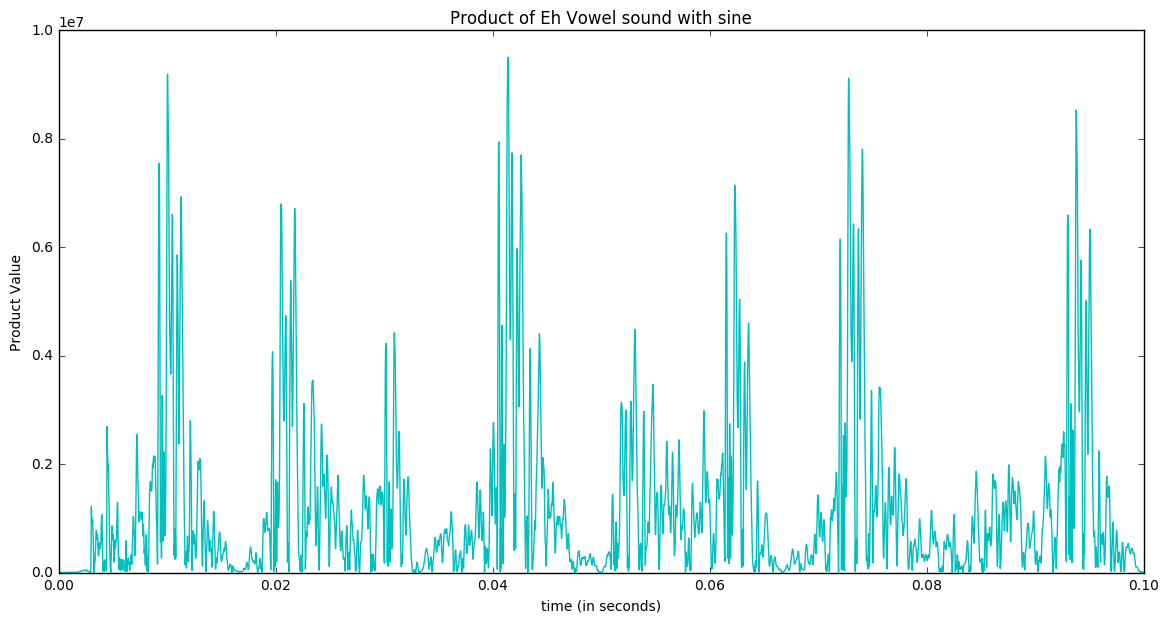

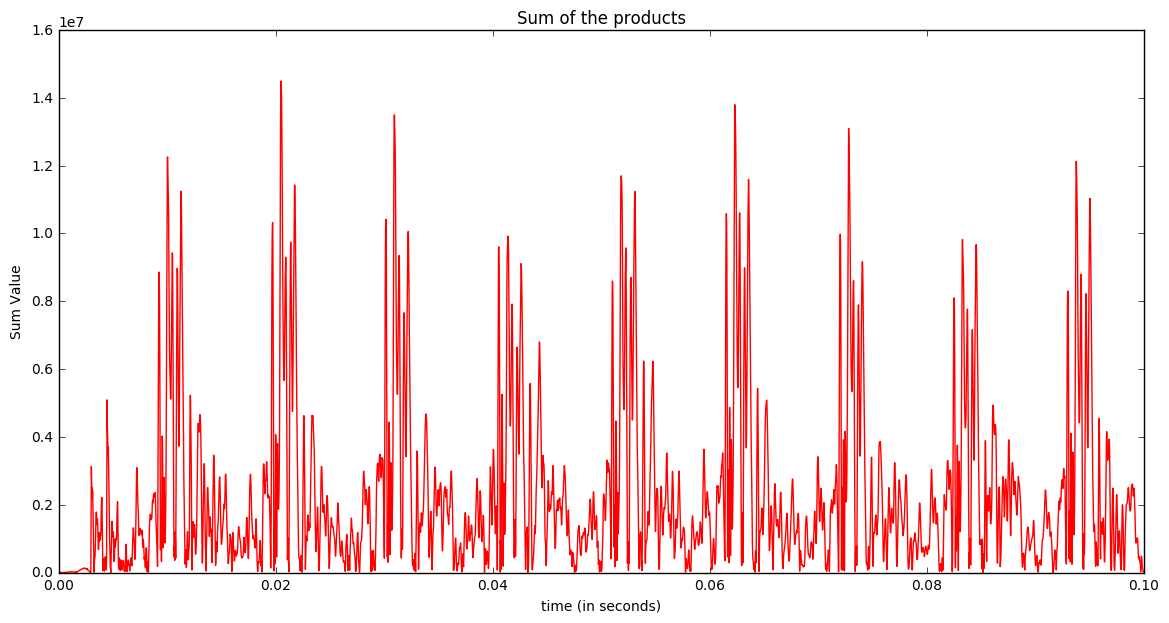

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile

def setup_graph(title='', x_label='', y_label='', fig_size=None):
    fig = plt.figure()
    if fig_size != None:
        fig.set_size_inches(fig_size[0], fig_size[1])
    ax = fig.add_subplot(111)
    ax.set_title(title)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)

# read the sound signal
(sample_rate_eh, input_signal_eh) = wavfile.read("audio_files/vowel_eh.wav")
time_array_eh = np.arange(0, len(input_signal_eh)/sample_rate_eh, 1/sample_rate_eh)
time_array_eh = time_array_eh[0:(sample_rate_eh//10)]
input_signal_eh = input_signal_eh[0:(sample_rate_eh//10)]


guessed_cycles = 3
guessed_ang_freq = (guessed_cycles * 2 * np.pi) / 0.1

guessed_cos_signal = np.cos(guessed_ang_freq * (time_array_eh))
guessed_sin_signal = np.sin(guessed_ang_freq * (time_array_eh))

f_input_signal_eh = np.asfarray(input_signal_eh)

# product
guessed_cos_signal = guessed_cos_signal * np.amax(f_input_signal_eh)
guessed_sin_signal = guessed_sin_signal * np.amax(f_input_signal_eh)

# plot cosine and sound signal
#plt.plot(time_array_eh, f_input_signal_eh,color='r')
#plt.plot(time_array_eh, guessed_cos_signal,color='g')
#plt.show()

#plt.plot(time_array_eh, f_input_signal_eh,color='r')
#plt.plot(time_array_eh, guessed_sin_signal,color='g')
#plt.show()

signal_product_different_cos = guessed_cos_signal * f_input_signal_eh
signal_product_different_sin = guessed_sin_signal * f_input_signal_eh

#plt.plot(time_array_eh, signal_product_different_cos,color='c')
#plt.show()

#plt.plot(time_array_eh, signal_product_different_sin,color='c')
#plt.show()

abs_sin = np.sqrt(signal_product_different_sin**2)
abs_cos = np.sqrt(signal_product_different_cos**2)

setup_graph(title='Product of Eh Vowel sound with cosine', x_label='time (in seconds)', y_label='Product Value', fig_size=(14,7))
plt.plot(time_array_eh, abs_cos,color='c')
plt.show()

setup_graph(title='Product of Eh Vowel sound with sine', x_label='time (in seconds)', y_label='Product Value', fig_size=(14,7))
plt.plot(time_array_eh, abs_sin,color='c')
plt.show()

[x + y for x, y in zip(abs_sin, abs_cos)]
#sum_cos_sin = np.add(abs_sin, abs_cos, axis=0)
setup_graph(title='Sum of the products', x_label='time (in seconds)', y_label='Sum Value', fig_size=(14,7))
line2d = plt.plot(time_array_eh, [(x + y) for x, y in zip(abs_sin, abs_cos)], color='r')
plt.show()